
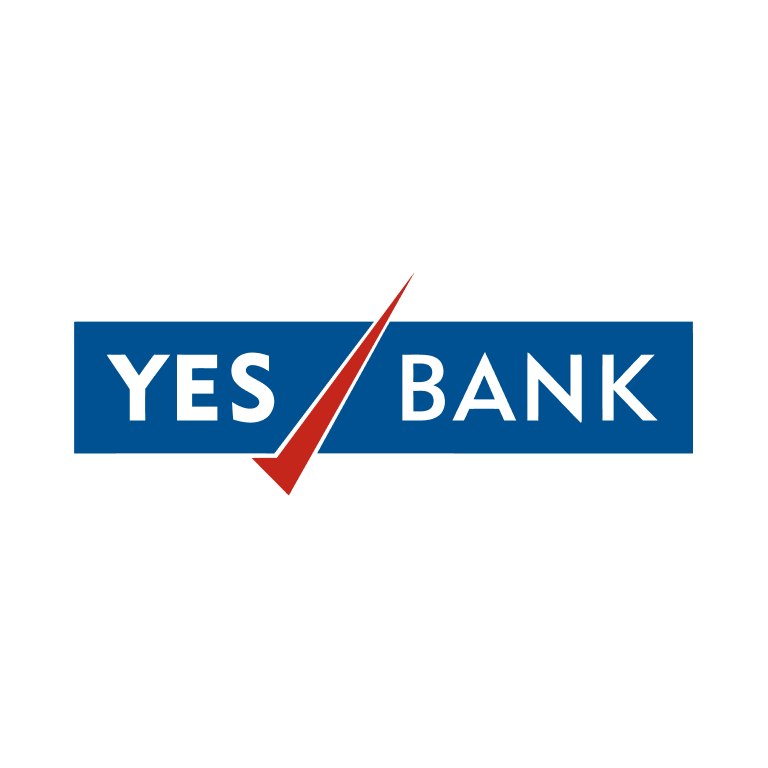


# **Project Name**    - Regression - Yes Bank Stock Closing Price Prediction

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -Rushikesh Chapole**

# **Project Summary -**

In this project, I applied Linear Regression to predict Yes Bank stock prices using historical OHLC (Open, High, Low, Close) data.

Key Steps:

##Data Preprocessing:

The OHLC data was initially skewed, so I applied a log transformation to both the features and the target variable to normalize the distribution.
After log transformation, I scaled the features to ensure consistent scaling across variables, preparing them for dimensionality reduction.


##Dimensionality Reduction (PCA):

Due to multicollinearity in OHLC data, I used Principal Component Analysis (PCA) to reduce dimensionality. This allowed the model to focus on the key components explaining most of the variance without overfitting.


##Train-Test Split:

The data was split into training and testing sets with an 80-20 ratio, ensuring that the target and feature indices were aligned correctly for consistent predictions.


##Model Training:

A Linear Regression model was trained on the PCA-transformed features and the log-transformed target variable (stock price). The simplicity of Linear Regression was chosen as a starting point for this analysis.


##Model Evaluation:

After training, the model's predictions were transformed back using the inverse log transformation (np.exp()), bringing both predicted and actual values back to their original scale.
The model was evaluated using key regression metrics:
Mean Squared Error (MSE).
Root Mean Squared Error (RMSE).
R² Score (Coefficient of Determination).
These metrics provided insight into how well the model predicted stock prices.


##Visualization:

I visualized the Actual vs Predicted stock prices over time using a line plot sorted by Date. This comparison highlighted the model's performance in capturing stock price trends.
Conclusion:
While the Linear Regression model demonstrated a reasonable fit, stock price prediction remains complex due to external market factors. Further improvements can be achieved by incorporating additional technical indicators or using more advanced models such as time series forecasting.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The objective of this project is to develop a predictive model for Yes Bank stock prices using historical OHLC (Open, High, Low, Close) data.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















In [ ]:
!pip install plotly



# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
#importing librabries and modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_csv('/content/data_YesBank_StockPrices.csv')

### Dataset First View

In [ ]:
df

### Dataset Rows & Columns count

In [ ]:
df.shape

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
df.isnull().sum()

In [ ]:
# Missing Values/Null Values Count

In [ ]:
# Visualizing the missing values using heatmap
Heatmap = sns.heatmap(df.isnull(), cbar=False)

mising value not available

## ***2. Understanding Your Variables***

In [ ]:
#information about columns and their datatypes
df.info()

In [ ]:
#converting datatype of Date column from object to Date
df['Date'] = pd.to_datetime(df['Date'],format='%b-%y')

In [ ]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month




### Variables Description

In [ ]:
# Dataset Describe
df.describe(include=[np.number])

Variables Description

Date : month date of record.

Open : Opening price.

High : Highest price in the month.

Low : Lowest price in the month.

Close : Closing price.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:

# Create moving average features (e.g., 3-month, 6-month)
df['ma_3'] = df['Close'].rolling(window=3).mean()  # 3-month moving average
df['ma_6'] = df['Close'].rolling(window=6).mean()  # 6-month moving average


Lets check for outliers prsent if any


In [ ]:
fig = plt.figure(figsize=(12,6))

columns = ['Open', 'High', 'Low', 'Close']


#using subplots and for loop to print boxplot for 'OHLC' Distributions
for i, column in enumerate(columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[column])

plt.subplots_adjust(hspace=0.5)

seems like there  are some outliers present in each column

lets see what are the outliers

In [ ]:
#defining function to figure out outliers and print them
def show_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers



In [ ]:
#finding all outliers and putting them all in one dataframe0
outliers_df = pd.concat([show_outliers_IQR(df['Open']),
                         show_outliers_IQR(df['High']),
                         show_outliers_IQR(df['Low']),
                         show_outliers_IQR(df['Close'])],axis=1)
outliers_df.sort_index()

In [ ]:
print('{} to {} are outliers'.format(df['Date'][144].date() ,df['Date'][159].date()))

The outliers detected in the dataset occur between July 2017 and September 2018, showing particularly high stock prices for Yes Bank. These are the most extreme values compared to the general range of the dataset

checked the outliers values and deduced that values present shown as outliers are nothing but volatility of market and seen values are actual stock prices

From all the above points we can say that these are not outliers , these are possible values.

---

### What all manipulations have you done and insights you found?

In [ ]:
df.info()

Changed date datatype from object to datetime

separated each month and year by creating two new columns

checked the outliers values and deduced that values present shown as outliers are nothing but volatility of market and seen values are actual stock prices



Potential outliers research showed that

YES Bank encountered difficulties following the central bank's asset quality reviews in 2017 and 2018, which resulted in a sharp increase in its impaired loans ratio and the discovery of significant governance lapses, resulting in a complete change of management.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
# Chart - 1 visualization code
fig = go.Figure(data=[go.Candlestick(x=df['Date'], open=df['Open'],high=df['High'],low=df['Low'], close=df['Close'])])

# Add title and labels
fig.update_layout(
    title='Candlestick Chart',
    yaxis_title='Price',
    xaxis_title='Date',
    xaxis_rangeslider_visible=False  # Remove range slider
)

# Show the figure
fig.show()


##### 1. Why did you pick the specific chart?

Candlestick charts are widely used for visualizing stock prices because they provide a rich amount of information in a compact format, allowing traders and analysts to understand market movements quickly. Here's why candlestick charts are preferred for visualizing stock prices:

Comprehensive Information:
A candlestick captures four key data points:

Open: The price at the start of the trading period.

Close: The price at the end of the trading period.

High: The highest price reached during the period.

Low: The lowest price reached during the period.

This allows traders to quickly grasp the range of price movements for a given time frame (day, week, etc.)

##### 2. What is/are the insight(s) found from the chart?

 Bullish Trend with High Volatility (July 2017 - August 2018):
Rising Prices: The candlestick chart during this period likely shows a steady upward trend, with the stock price climbing from approximately ₹290 in July 2017 to a peak of ₹370+ in August 2018. This suggests a strong bullish sentiment in the market, with consistent demand for Yes Bank stock.

Volatility: Long candlestick wicks during this period would indicate high volatility. The stock prices fluctuated significantly, especially in the later months. This might signal investor uncertainty, or heightened interest due to significant market events or news related to the bank.

Potential Reversal Signals (September 2018):
Sharp Drop in Low Price: In September 2018, a significant drop in the low price (down to ₹166.15) is noticeable. If the candlestick for this month shows a long lower wick (indicating that the price dropped sharply but recovered before the close), this could signal a "hammer" pattern. A hammer often indicates a potential reversal after a downtrend, showing that buyers are starting to step in after a large sell-off.

---

Lets Visualise  min , max and mean for each of the column Year-wise

In [ ]:


Agg_df = df.groupby('Year').agg({
    'Open': ['min', 'max', 'mean'],
    'High': ['min', 'max', 'mean'],
    'Low': ['min', 'max', 'mean'],
    'Close': ['min', 'max', 'mean']
})


In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(Agg_df , annot = True, cmap = 'coolwarm', fmt='.2f')
plt.xlabel('Min-Max-Mean')


Heatmap is used here to show prizes because

due to its ability to present complex data patterns in an intuitive and visually striking format.

A sudden color change in a heatmap can indicate a price spike or crash, helping analysts spot significant events or unusual activity in the stock market.

All time high was 404, it was in 2018.

All time low was 5.55, it was in 2020.

In year of 2017 and 2018 prices were at their peak.

Here also we can see price drop after 2018.

In [ ]:
# Create a histogram showing kde curve

columns = ['Open', 'High', 'Low', 'Close']

fig , ax = plt.subplots(2 , 2 ,figsize=(10, 6))


ax = ax.flatten()

for i, column in enumerate(columns):
    sns.histplot(df[column], kde=True, ax=ax[i],)  # Plot each dataset on the respective axis
    ax[i].axvline(np.mean(df[column]),color='r', linestyle='--')
    ax[i].axvline(np.median(df[column]),color='b', linestyle='--')
    ax[i].set_title(f'Plot {i+1}')  # Add a title to each subplot

plt.subplots_adjust(hspace=0.5)



##### 1. Why did you pick the specific chart?

A histplot (histogram plot) is a type of plot in data visualization that displays the distribution of a dataset. It’s one of the most common ways to summarize and visualize the underlying frequency distribution of continuous data.

##### 2. What is/are the insight(s) found from the chart?

histplot can show if the data is skewed to the left or right. This is important when you are trying to assess the symmetry of your data, which can affect statistical analysis and modeling.

Benefit: You can visually assess the mean, median, and mode of the data, along with how tightly or widely distributed the data points are.

Linear regression models typically assume that the residuals (errors) are normally distributed. When the data is skewed, this assumption is violated.

Impact: Skewed data can result in residuals that are also skewed, leading to unreliable hypothesis tests, inaccurate confidence intervals, and incorrect p-values for determining variable significance.

---

Lets visualize 'open' , 'close' relationship using Scatter plot

Choosing a scatterplot to visualize the relationship between the Open and Close prices of stock data offers several benefits:

**Correlation Detection**: Scatterplots help in visualizing how the Open and Close prices are related. A linear or clustered pattern in the plot can indicate the strength and direction of their relationship (positive, negative, or no correlation).


**Trend Identification**: If the scatterplot shows a strong linear pattern, it might suggest that stock prices tend to close near their opening prices. Conversely, deviations can highlight volatile days.


**Outlier Detection**: Scatterplots make it easy to spot days when the Close price significantly deviates from the Open price, indicating abnormal price movements or high volatility.


**Simple and Intuitive**: A scatterplot is a simple yet effective way to represent the data points without clutter, making it easy to interpret.

In [ ]:

#scatter plot between open and close columns

plt.scatter(df['Open'], df['Close'])
corr = df['Open'].corr(df['Close'])
plt.title(f'Scatter Plot of Open vs Close (Correlation: {corr:4f})')
plt.xlabel('Open')
plt.ylabel('Close')



In [ ]:

#scatter plot between high and close columns


plt.scatter(df['High'], df['Close'])
corr = df['High'].corr(df['Close'])
plt.title(f'Scatter Plot of High vs Low (Correlation: {corr:4f})')
plt.xlabel('High')
plt.ylabel('Close')

In [ ]:
#
#scatter plot between low and close columns
plt.scatter(df['Low'], df['Close'])
corr = df['Low'].corr(df['Close'])
plt.title(f'Scatter Plot of low vs Close (Correlation: {corr:4f})')
plt.xlabel('low')
plt.ylabel('Close')

all independent variables are linearly dependent on target variable


Linear Dependence: A clear linear relationship was identified between the Open, High, and Low prices with the Close price. This suggests that the closing price can be predicted with reasonable accuracy using these variables.


Multicollinearity Consideration: Given the inherent relationship between Open, High, and Low prices, there was potential for multicollinearity. To address this, Principal Component Analysis (PCA) was applied to reduce dimensionality and mitigate any multicollinearity issues, ensuring that the regression model remains robust and interpretable.

In [ ]:
#Heatmap of OHLC variables

heat_map_data = df[['Open', 'High', 'Low', 'Close']]





sns.heatmap(heat_map_data.corr(), annot=True, cmap='coolwarm')

When the OHLC (Open, High, Low, Close) stock prices have a high correlation with each other, it introduces several potential problems in a linear regression model. Specifically, this situation can lead to multicollinearity, which can distort the results and reduce the effectiveness of the regression analysis.

Given the strong linear relationships between the Open, High, and Low prices, there is a risk of multicollinearity—a situation where these variables are highly correlated with each other, which can inflate the variance of coefficient estimates in regression models and reduce their interpretability

In [ ]:
#code to visualise scatter plot pairs between each 'ohlc' variables

sns.pairplot(df.drop(columns={'ma_3', 'ma_6'}),diag_kind="kde")

In [ ]:
#line plot to visualize time series data of OHLC variables



fig , ax = plt.subplots(2 , 2 ,figsize=(10, 6))


ax = ax.flatten()


sns.lineplot(data=df, x='Date', y='Open', ax=ax[0], label='Open', color='blue')
sns.lineplot(data=df, x='Date', y='High', ax=ax[1], label='High', color='green')
sns.lineplot(data=df, x='Date', y='Low', ax=ax[2], label='Low', color='red')
sns.lineplot(data=df, x='Date', y='Close', ax=ax[3], label='Close', color='orange')

plt.subplots_adjust(hspace=0.5)

plt.xlabel('Date')

plt.legend()
plt.show()



In [ ]:
#volatility or rolling 20 days standard deviation graph


df['Volatility'] = df['Close'].rolling(window=20).std()
plt.plot(df['Date'], df['Volatility'], color='purple')
plt.xlabel('Date')
plt.ylabel('Volatility (20-Day Rolling Std Dev)')
plt.title('Volatility of Close Price Over Time')
plt.show()


Purpose: To measure the volatility of the close price over time.


: High volatility can indicate periods of increased uncertainty in the stock price.

---

Linear regression assumes that the residuals (the differences between observed and predicted values) are normally distributed. If your features are heavily skewed, it can lead to non-normally distributed residuals, which violates this assumption

to mitigate the effects of skewness, you can apply various transformations to your features

Log Transformation: Often used for right-skewed data. It compresses the range of the data and can help stabilize variance.


X
′
 =log(X+c)
where
𝑐
c is a constant added to avoid taking the logarithm of zero.

In [ ]:
#code to log transform data into normal distribution from positively skewed distribution

df['log_open'] = np.log(df['Open'])
df['log_high'] = np.log(df['High'])
df['log_low'] = np.log(df['Low'])
df['log_close'] = np.log(df['Close'])

In [ ]:
#code to plot log_open
plt.figure(figsize = (8,5))
sns.histplot(df['log_open'] , kde=True)

In [ ]:
#code to plot log_high

plt.figure(figsize = (8,5))
sns.histplot(df['log_high'] , kde=True)

In [ ]:
#code to plot log_low

plt.figure(figsize = (8,5))
sns.histplot(df['log_low'] , kde=True)

Normalization: The log transformation effectively normalizes the distribution of the OHLC variables, especially if they were previously skewed. This makes them more suitable for modeling.

you can see that in visualised Graph of open vs log_open . 'open'column's distribution looks right skewed but for 'log_open' column's graph is symmetric in nature meaning more towards normal

---

##Hypothetical Statement 1

: The average close price on days when the open price is higher than the previous day's close is greater than on days when it is lower.


Null Hypothesis (H₀): The average close price is the same regardless of whether the open price is higher or lower than the previous day's close.


Alternative Hypothesis (H₁): The average close price is higher when the open price is greater than the previous day's close.
To test this, you can create two groups: one where the open price is higher than the previous day's close, and another where it's lower. Then, perform an independent t-test.

In [ ]:
import pandas as pd
from scipy import stats

# Create a new column for the previous day's close price
df['Prev_Close'] = df['Close'].shift(1)

# Create two groups based on the condition
group_higher = df[df['Open'] > df['Prev_Close']]['Close']
group_lower = df[df['Open'] <= df['Prev_Close']]['Close']



# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(group_higher, group_lower, equal_var=False)  # Use equal_var=False if variances are not equal

# Print results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Set significance level
alpha = 0.05

# Check if we can reject the null hypothesis
if p_value < alpha:
    print("Reject the null hypothesis:")
    print("The average close price is higher when the open price is greater than the previous day's close.")
else:
    print("Fail to reject the null hypothesis:")
    print("The average close price is the same regardless of whether the open price is higher or lower than the previous day's close.")


---

##Statement 2

: The Average Closing Price is Higher on Days with Higher High Prices

Null Hypothesis (H0): The average closing price on days with highr high prices is equal to that on days with lower high prices.


Alternative Hypothesis (H1): The average closing price on days with higher high prices is greater than that on days with lower high prices.
Testing Method: Perform a t-test to compare the means of closing prices on days with high prices above a certain threshold and those below.

In [ ]:
# Define a threshold for high prices
high_price_threshold = df['High'].mean()

# Split the data based on the threshold
high_close_prices = df[df['High'] > high_price_threshold]['Close']
low_close_prices = df[df['High'] <= high_price_threshold]['Close']

# Perform a t-test
t_stat, p_value = stats.ttest_ind(high_close_prices, low_close_prices)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Significance level
if p_value < alpha:
    print("Reject the null hypothesis: The average closing price is higher on days with higher high prices.")
else:
    print("Fail to reject the null hypothesis: The average closing price is not significantly higher.")


In [ ]:
#code for scaling data variables

scaler = StandardScaler()


data = df[['log_open', 'log_high', 'log_low' ,'log_close']]

scaled_data = scaler.fit_transform(data)   #scaling code

scaled_y = scaled_data[:,3]  #scaled target variable

In [ ]:
for i in range(scaled_data.shape[1]-1):  # Loop through each feature to get histplot of features
    plt.figure()
    plt.hist(scaled_data[:, i], bins=30, alpha=0.7, color='blue')
    plt.title(f'Distribution of Feature {i+1}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

Many regression algorithms, such as linear regression using gradient descent, can converge faster when features are on a similar scale. If one feature has a much larger range than others, the optimization algorithm may take longer to converge or may not converge at all.

---

Lets take a look at covariance of columns. covariance matrix, which will show how each pair of features varies together. The values can indicate positive, negative, or no correlation between the features.

In [ ]:
cov_matrix = np.cov(scaled_data, rowvar=False)

# Print the covariance matrix
print("Covariance Matrix:")
print(cov_matrix)

The analysis indicates that there is a strong correlation among the features, as evidenced by the high covariance values observed in the covariance matrix

---


To address high covariance among features, we can consider several strategies to reduce multicollinearity and improve  model’s performance

one such strategy is PCA we can use feature selection after pca


PCA transforms the original features into a new set of uncorrelated features called principal components. These components are linear combinations of the original features.
The first few principal components usually capture most of the variance in the data, while the later components capture less.

 Instead of selecting original features, you can choose a subset of the principal components that explain a significant amount of variance

In [ ]:

pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_data)


pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Explained variance ratio (to understand how much variance is explained by each PC)
explained_variance = pca.explained_variance_ratio_

# Print results
print("Principal Components:\n", pca_df)
print("Explained Variance Ratio:", explained_variance)

In [ ]:


# Plotting the explained variance
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
plt.ylabel('Variance Ratio')
plt.xlabel('Principal Component')
plt.title('PCA Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()

In this case, retaining one component (the first one) would suffice to represent the majority of the information in  data. as explained variance is very large in case of first feature and other feature contribute very little

In [ ]:
transformed_data = pca.transform(scaled_data)[:, 1].reshape(-1, 1)
transformed_data

In [ ]:
X_train_log, X_test_log, y_train_log, y_test_log, train_indices, test_indices = train_test_split(pca_df, scaled_y,np.arange(len(scaled_y)), test_size=0.2, random_state=42)

In [ ]:
# Get indices of y_train and y_test
print("Train indices:", train_indices)



In [ ]:
# Get indices of y_train and y_test
print("Test indices:", test_indices)


##Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_log, y_train_log)  # Fit model to PCA-transformed features and log-transformed target


In [ ]:
import numpy as np

y_testpred_log = model.predict(X_test_log)
y_testpred = np.exp(y_testpred_log)  # Inverse of the log transformation
y_test_original = np.exp(y_test_log)  # Inverse of the log transformation

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming y_test contains the true values of the target (log-transformed)
# and y_pred_log contains the predicted log-transformed values from your model.
y_train_pred = np.exp(model.predict(X_train_log))  # Predictions on the original scale
y_train_original = np.exp(y_train_log)  # True values on the original scale (if y_test is log-transformed
y_train_pred_log = model.predict(X_train_log)



# Calculate MSE on the original scale
mse = mean_squared_error(y_test_original, y_testpred)
print(f"Mean Squared Error: {mse}")
np.var(y_test_original)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np


# Calculate MSE
mse = mean_squared_error(y_test_original, y_testpred)

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")
print(np.mean(y_test_original))

In [ ]:
from sklearn.metrics import r2_score
import numpy as np


# Calculate R² score
r2 = r2_score(y_test_original, y_testpred)
print(f"R² Score: {r2}")


#### Chart - 10

In [ ]:
final_test_df = df.iloc[test_indices]
final_test_df

finaltrain_df = df.iloc[train_indices]
finaltrain_df




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a time period index for plotting
# Replace 'time_period' with your actual time index


# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(final_test_df['Date'], y_test_original, label='Actual Values', color='blue', marker='o', linestyle='-')
plt.scatter(final_test_df['Date'], y_testpred, label='Predicted Values', color='orange', marker='x', linestyle='--')

# Adding labels and title
plt.xlabel('Time Period')  # Change as needed (e.g., 'Date' or 'Month')
plt.ylabel('Target Variable')  # Change to your target variable's name
plt.title('Actual vs. Predicted Values Over Time(test data)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


y_train_pred = np.exp(model.predict(X_train_log))  # Predictions on the original scale

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(finaltrain_df['Date'], y_train_original, label='Actual Values', color='blue', marker='o', linestyle='-')
plt.scatter(finaltrain_df['Date'], y_train_pred, label='Predicted Values', color='orange', marker='x', linestyle='--')

# Adding labels and title
plt.xlabel('Time Period')
plt.ylabel('Target Variable')
plt.title('Actual vs. Predicted Values Over Time  (train Data)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame that includes Date and y_train_original
combined_df = pd.DataFrame({
    'Date': finaltrain_df['Date'],
    'y_train_original': y_train_original,
    'y_train_pred': y_train_pred
})

# Sort the DataFrame by Date
combined_df_sorted = combined_df.sort_values(by='Date')

# Extract sorted values for plotting
dates_sorted = combined_df_sorted['Date']
y_train_original_sorted = combined_df_sorted['y_train_original']
y_train_pred_sorted = combined_df_sorted['y_train_pred']

# Create a line plot for Actual vs Predicted values sorted by Date
plt.figure(figsize=(10, 6))
plt.plot(dates_sorted, y_train_original_sorted, label='Actual Values', color='blue', marker='o', linestyle='-')
plt.plot(dates_sorted, y_train_pred_sorted, label='Predicted Values', color='orange', marker='x', linestyle='--')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Target Value')
plt.title('Actual vs Predicted Values Sorted by Date')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


##Ridge Regression Model

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)

# Fit the model
ridge.fit(X_train_log, y_train_log)

# Predict on test set
y_testpred_ridge = ridge.predict(X_test_log)


import numpy as np

y_testpred_log_ridge = ridge.predict(X_test_log)
y_testpred_ridge = np.exp(y_testpred_log_ridge)  # Inverse of the log transformation
y_test_original = np.exp(y_test_log)  # Inverse of the log transformation


y_train_pred_ridge = np.exp(ridge.predict(X_train_log))  # Predictions on the original scale
y_train_original = np.exp(y_train_log)  # True values on the original scale (if y_test is log-transformed
y_train_pred_log_ridge = ridge.predict(X_train_log)




# Model evaluation
mse = mean_squared_error(y_test_original, y_testpred_ridge)
r2 = r2_score(y_test_original, y_testpred_ridge)
print(f"Ridge MSE: {mse}, R^2: {r2}")

In [ ]:
final_test_df_ridge = df.iloc[test_indices]
final_test_df_ridge

finaltrain_df_ridge = df.iloc[train_indices]
finaltrain_df_ridge



In [ ]:
import numpy as np
import matplotlib.pyplot as plt



# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(final_test_df_ridge['Date'], y_test_original, label='Actual Values', color='blue', marker='o', linestyle='-')
plt.scatter(final_test_df_ridge['Date'], y_testpred_ridge, label='Predicted Values', color='orange', marker='x', linestyle='--')

# Adding labels and title
plt.xlabel('Time Period')
plt.ylabel('Target Variable')
plt.title('Actual vs. Predicted Values Over Time(test data)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(finaltrain_df_ridge['Date'], y_train_original, label='Actual Values', color='blue', marker='o', linestyle='-')
plt.scatter(finaltrain_df_ridge['Date'], y_train_pred_ridge, label='Predicted Values', color='orange', marker='x', linestyle='--')

# Adding labels and title
plt.xlabel('Time Period')
plt.ylabel('Target Variable')
plt.title('Actual vs. Predicted Values Over Time(train data)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame that includes Date and y_train_original
combined_df_ridge = pd.DataFrame({
    'Date': finaltrain_df['Date'],
    'y_train_original': y_train_original,
    'y_train_pred': y_train_pred_ridge
})

# Sort the DataFrame by Date
combined_df_ridge_sorted = combined_df_ridge.sort_values(by='Date')

# Extract sorted values for plotting
dates_sorted = combined_df_ridge_sorted['Date']
y_train_original_ridge_sorted = combined_df_ridge_sorted['y_train_original']
y_train_pred_ridge_sorted = combined_df_ridge_sorted['y_train_pred']

# Create a line plot for Actual vs Predicted values sorted by Date
plt.figure(figsize=(10, 6))
plt.plot(dates_sorted, y_train_original_ridge_sorted, label='Actual Values', color='blue', marker='o', linestyle='-')
plt.plot(dates_sorted, y_train_pred_ridge_sorted, label='ridge Predicted Values', color='orange', marker='x', linestyle='--')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Target Value')
plt.title('Actual vs ridge Predicted Values Sorted by Date')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***